In [9]:
from hfqco.calculator import nominal_ic, shunt_calc
print(nominal_ic(Ic=0.608, L=3.5*))
print(shunt_calc(area=0.57,betac=2))

3.776979418408966e+61
19.80054951627729


･ (Period to calculate initial phase)		=  1e-10  ~  4e-10 [s]
･ (Acceptable switch timing delay)		=  1.8e-10 [s]
･ (Interval between input SFQ or HFQ pulses)	=  5e-10 [s]
Simulate with default values.
Using default parameters


100%|██████████| 9/9 [00:26<00:00,  2.94s/it]


,low(value),low(%),high(value),high(%)
Lin,13.242188,-55.859375,45.234375,50.78125
Ic2,0.002109,-99.609375,1.075781,99.21875
Ic3,0.002375,-99.609375,0.969000,59.37500
L1,0.035156,-99.609375,18.000000,100.00000
Rin,0.195312,-99.609375,100.000000,100.00000
BIAS,0.001953,-99.609375,1.000000,100.00000
R1,28.437500,-56.250000,130.000000,100.00000
Ic4,0.002375,-99.609375,0.916750,50.78125
Ic1,0.002375,-99.609375,0.945250,55.46875


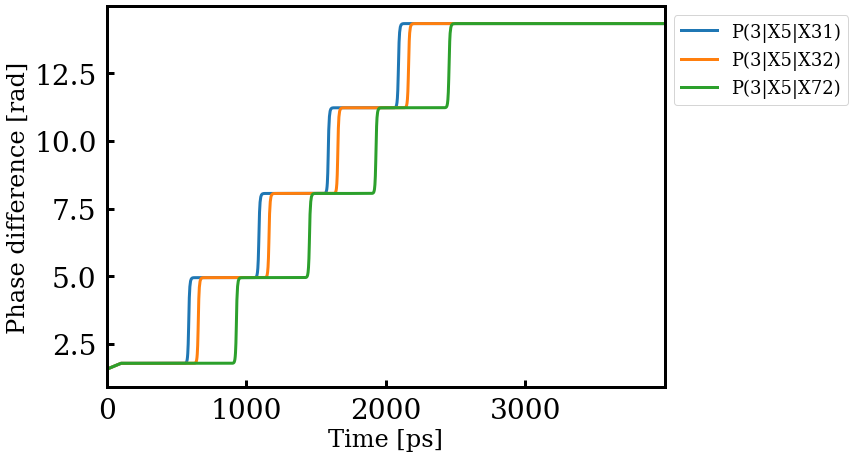

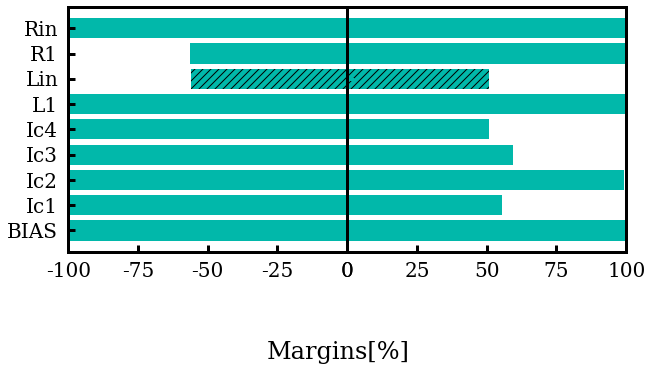

In [1]:
input = """
.model jjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA)
.model pjjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA, PHI=PI)

** + -------------------- +
** |     HFQJTL           |
** + -------------------- +
.subckt jtl_squid   3       5 
L1                  3       1   1.75pH fcheck
L2                  3       4   1.75pH fcheck
B1                  1       5   jjmod area=0.608
R1                  1       5   20ohm 
B2                  2       5   jjmod area=0.608
R2                  2       5   20ohm
B3                  4       2   pjjmod area=20
R3                  4       2   0.39ohm
.ends

.subckt jtl_base        1       5       100
L1                      1       2       1pH
L2                      2       3       4.2pH
L3                      3       4       8.4pH
L4                      4       5       3.2pH
X1      jtl_squid       3       0
X2      jtl_squid       4       0
R1                      2       100     34ohm
.ends

.subckt jtl_base8       1       9       100
X1      jtl_base        1       2       100
X2      jtl_base        2       3       100
X3      jtl_base        3       4       100
X4      jtl_base        4       5       100
X5      jtl_base        5       6       100
X6      jtl_base        6       7       100
X7      jtl_base        7       8       100
X8      jtl_base        8       9       100
.ends
** + ---------------------------------- +


** + -------------------- +
** |     DC-HFQ           |
** + -------------------- +
.subckt dchfq_squid1   3       5 
L1                  3       1   1.75pH fcheck
L2                  3       4   1.75pH fcheck
B1                  1       5   jjmod area=#Ic1(0.608)
R1                  1       5   20ohm 
B2                  2       5   jjmod area=#Ic1(0.608)
R2                  2       5   20ohm
B3                  4       2   pjjmod area=20
R3                  4       2   0.39ohm
.ends

.subckt dchfq_squid2   3       5 
L1                  3       1   1.75pH fcheck
L2                  3       4   1.75pH fcheck
B1                  1       5   jjmod area=#Ic2(0.54)
R1                  1       5   20ohm 
B2                  2       5   jjmod area=#Ic2(0.54)
R2                  2       5   20ohm
B3                  4       2   pjjmod area=20
R3                  4       2   0.39ohm
.ends

.subckt dchfq_squid3   3       5 
L1                  3       1   1.75pH fcheck
L2                  3       4   1.75pH fcheck
B1                  1       5   jjmod area=#Ic3(0.608)
R1                  1       5   20ohm 
B2                  2       5   jjmod area=#Ic3(0.608)
R2                  2       5   20ohm
B3                  4       2   pjjmod area=20
R3                  4       2   0.39ohm
.ends

.subckt dchfq_squid4   3       5 
L1                  3       1   1.75pH fcheck
L2                  3       4   1.75pH fcheck
B1                  1       5   jjmod area=#Ic4(0.608)
R1                  1       5   20ohm 
B2                  2       5   jjmod area=#Ic4(0.608)
R2                  2       5   20ohm
B3                  4       2   pjjmod area=20
R3                  4       2   0.39ohm
.ends


.subckt dchfq        1       9       100
R1                      1       2       #Rin(50)ohm
L1                      2       0       #Lin(30)pH
L2                      2       3       1pH
X1      dchfq_squid1    3       4
L3                      4       5       1pH
X2      dchfq_squid2    5       0
L4                      5       6       1pH
R2                      6       100     #R1(65)ohm
L5                      6       7       #L1(9)pH
X3      dchfq_squid3    7       0
L6                      7       8       8.4pH
X4      dchfq_squid4    8       0
L7                      8       9       3.2pH

.ends
** + ---------------------------------- +




*** top cell: 

Vin                     21       0       PWL(0ps 0mV   540ps 0mV 550ps 250mV 850ps 250mV 860ps 0mV   1040ps 0mV 1050ps 250mV 1350ps 250mV 1360ps 0mV   1540ps 0mV 1550ps 250mV 1850ps 250mV 1860ps 0mV   2040ps 0mV 2050ps 250mV 2350ps 250mV 2360ps 0mV)
R1                          21      31      1000ohm 
X1      dchfq               31      32      200  
X31    jtl_base8            32      33      100
X32    jtl_base8            33      34      100
X33    jtl_base8            34      35      100
X34    jtl_base8            35      36      100


X71    jtl_base8            36      73      100
X72    jtl_base8            73      74      100
X73    jtl_base8            74      75      100
X74    jtl_base8            75      76      100
R72                         76      77                      8.32ohm
L71                         77      0                       2pH fcheck


Vb1                         100     0                       pwl(0ps 0mV 100ps 0.5mV)
Vb2                         200     0                       pwl(0ps 0mV 100ps #BIAS(0.5)mV)


*** jsim input file ***
.tran 1ps 4000ps 0ps 1ps

.print phase  3|X5|X31

.print phase  3|X5|X32

.print phase  3|X5|X72

.end
"""


config_data = {
    "avgcalc.start.time":100e-12,
    "avgcalc.end.time":400e-12,
    "pulse.delay":180e-12,
    "pulse.interval": 500e-12,
    "phase.ele": ["P(3|X5|X32)","P(3|X5|X32)","P(3|X5|X72)"],
    "voltage.ele" : [],
    "allow.multi.swithes" : False
}


from hfqco import data, util, pyjosim, netlist

from hfqco.pyjosim import simulation
from hfqco.graph import sim_plot
import importlib
importlib.reload(data)
importlib.reload(util)
importlib.reload(netlist)



# df = simulation(input)
# sim_plot(df)

inp_df = util.create_inp_df("R1",30,70,5,"L1",5,20,2)
d = netlist.Netlist(input, config_data)
d.get_margins()
# d.custom_simulation(inp_df)
# inp_df.to_csv("dc-hfq2.csv")

# d = data.Data(netlist_and, config_data)
# d.get_base_switch_timing()
# 
